In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

from matplotlib import pyplot as plt 
%matplotlib inline 

import seaborn as sns

In [4]:
data = pd.read_excel('/Users/dongyokim/Library/Mobile Documents/com~apple~CloudDocs/2022:1/비즈니스 애널리틱스/연습문제15.2/연습문제15.2군집분석.xlsx', )

In [5]:
data.head()

,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange
0,ABT,Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy,US,NYSE
1,AGN,"Allergan, Inc.",7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,Moderate Buy,CANADA,NYSE
2,AHM,Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,Strong Buy,UK,NYSE
3,AZN,AstraZeneca PLC,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,Moderate Sell,UK,NYSE
4,AVE,Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy,FRANCE,NYSE


In [6]:
data.shape

(21, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Symbol                 21 non-null     object 
 1   Name                   21 non-null     object 
 2   Market_Cap             21 non-null     float64
 3   Beta                   21 non-null     float64
 4   PE_Ratio               21 non-null     float64
 5   ROE                    21 non-null     float64
 6   ROA                    21 non-null     float64
 7   Asset_Turnover         21 non-null     float64
 8   Leverage               21 non-null     float64
 9   Rev_Growth             21 non-null     float64
 10  Net_Profit_Margin      21 non-null     float64
 11  Median_Recommendation  21 non-null     object 
 12  Location               21 non-null     object 
 13  Exchange               21 non-null     object 
dtypes: float64(9), object(5)
memory usage: 2.4+ KB


In [18]:
from sklearn.preprocessing import StandardScaler

In [9]:
data.iloc[:, 2: 11]

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
0,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1
1,7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5
2,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2
3,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0
4,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9
5,16.90,1.11,27.9,3.9,1.4,0.6,0.00,-3.17,2.6
6,51.33,0.50,13.9,34.8,15.1,0.9,0.57,2.70,20.6
7,0.41,0.85,26.0,24.1,4.3,0.6,3.51,6.38,7.5
8,0.78,1.08,3.6,15.1,5.1,0.3,1.07,34.21,13.3
9,73.84,0.18,27.9,31.0,13.5,0.6,0.53,6.21,23.4


In [ ]:
correlation

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(StandardScaler().fit_transform(data.iloc[:, 2: 11]),'single', 'correlation')
labelList = [i for i in data['Symbol']]
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

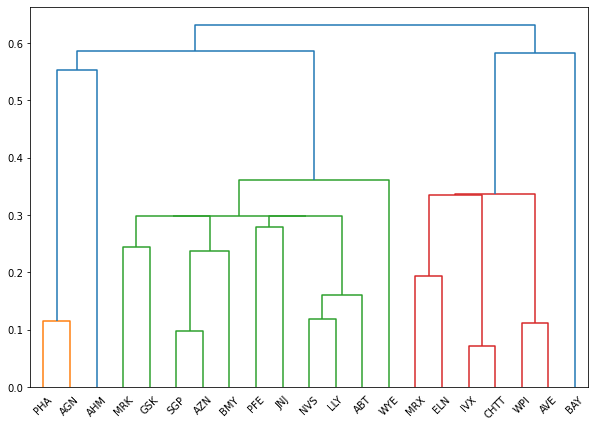

In [30]:
linked = linkage(StandardScaler().fit_transform(data.iloc[:, 2: 11]),'single', 'mahalanobis')

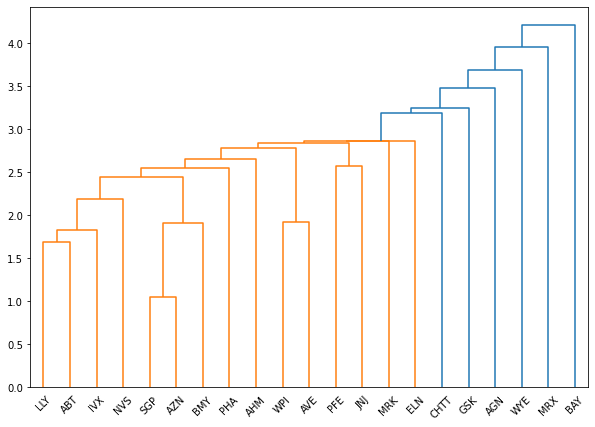

In [31]:
labelList = [i for i in data['Symbol']]
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [32]:
def visualize_sil(List, X):
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import numpy as np



    for n_clusters in List:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters + \
                          '\nSilhouette Score :' + str(round(silhouette_avg,3)) ,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()



For n_clusters = 2 The average silhouette_score is : 0.5947884206411859
For n_clusters = 3 The average silhouette_score is : 0.5208425587745117
For n_clusters = 4 The average silhouette_score is : 0.35823390872816707
For n_clusters = 5 The average silhouette_score is : 0.408322850863178
For n_clusters = 6 The average silhouette_score is : 0.3606909378541716
For n_clusters = 7 The average silhouette_score is : 0.3864814543321989


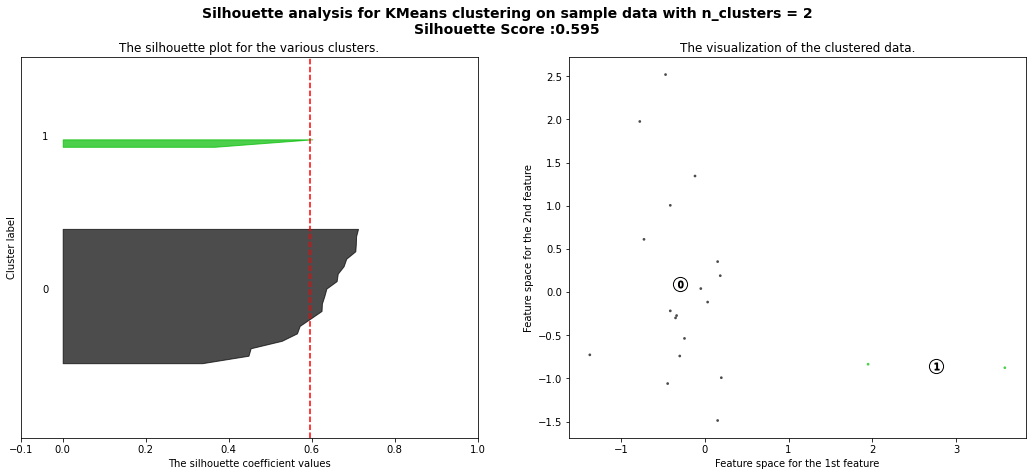

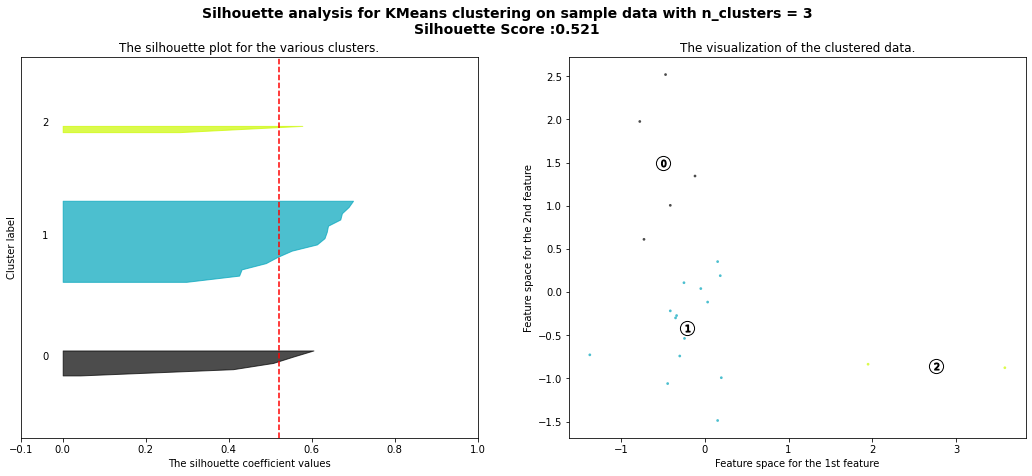

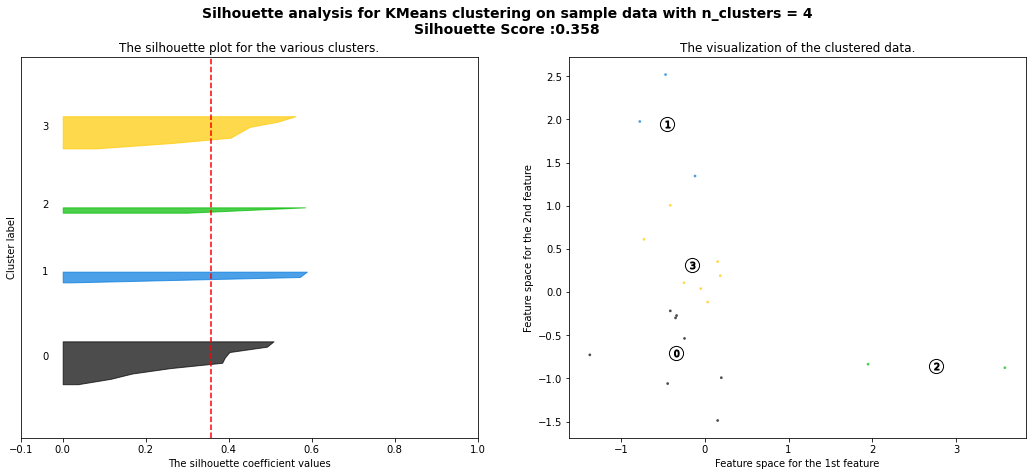

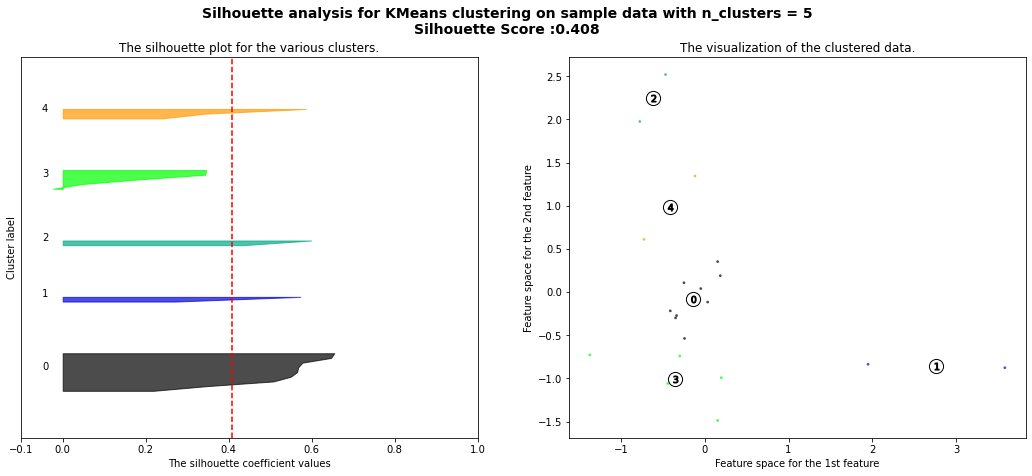

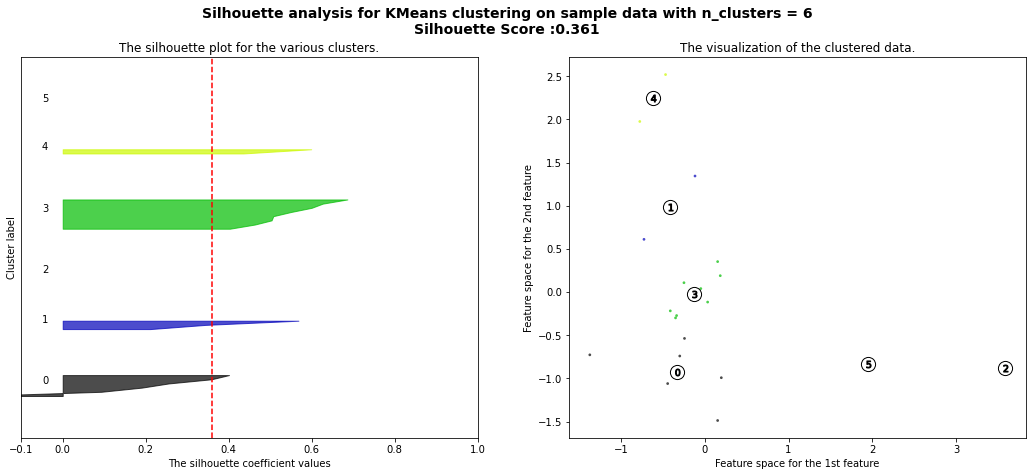

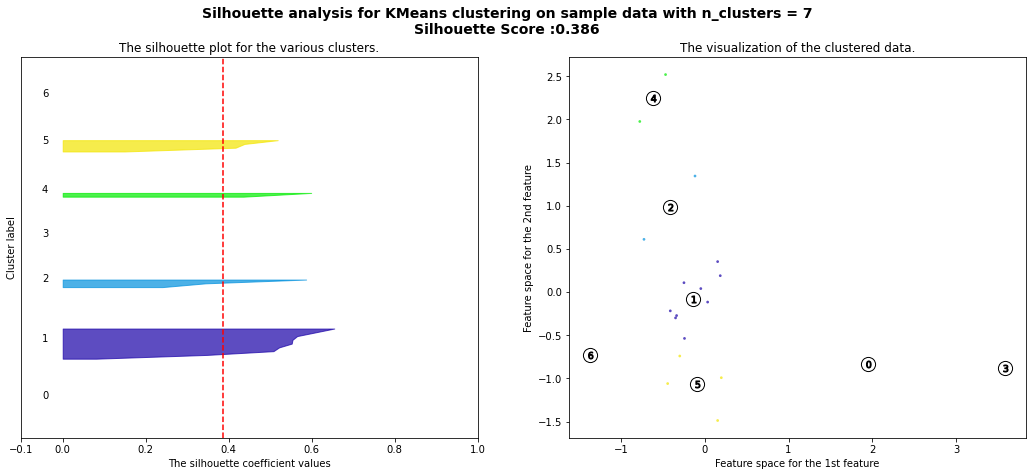

In [40]:
visualize_sil([2, 3, 4, 5, 6, 7], StandardScaler().fit_transform(data.iloc[:, 4:6]))